In [58]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.axes
from matplotlib.offsetbox import AnchoredText
import csv
import pylab as pl
import numpy as np
import config_constants as cc

In [102]:
# Load data and add column names
folder = '.\Results\AutoDriftTest_20230314_140225'
startlist = '\AutoDriftTest_20230314_140225\StartList'
endlist = '\AutoDriftTest_20230314_140225\EndList'
fulllist = '\AutoDriftTest_20230314_140225\FullList'
headers = ['X (mm)', 'Y (mm)']
starts = pd.read_csv('.\Results\%s.csv' %startlist, names=headers) #select your file
ends = pd.read_csv('.\Results\%s.csv' %endlist, names=headers) #select your file
moves = pd.read_csv('.\Results\%s.csv' %fulllist, names=headers) #select your file

In [103]:
print(starts)
print(ends)

     X (mm)   Y (mm)
0   9.83025  7.15275
1   9.82175  7.16125
2   9.85575  7.15275
3   9.77925  7.15275
4   9.75375  7.16125
5   9.70275  7.16125
6   9.65175  7.16125
7   9.63475  7.16125
8   9.56675  7.15275
9   9.48175  7.15275
10  9.43925  7.15275
11  9.35425  7.15275
12  9.22675  7.15275
13  9.10775  7.15275
14  8.98875  7.15275
15  8.90375  7.14425
16  8.75925  7.13575
17  8.58075  7.13575
18  8.36825  7.13575
19  8.15575  7.12725
20  7.91775  7.11875
21  7.73925  7.11875
22  7.73075  7.09325
23  7.72225  7.08475
24  7.73075  7.08475
25  7.72225  7.07625
26  7.73075  7.06775
27  7.73075  7.06775
28  7.73075  7.05925
29  7.73075  7.05925
30  7.73075  7.05925
31  7.72225  7.05925
32  7.72225  7.05925
33  7.73075  7.05075
34  7.73075  7.05075
35  7.73075  7.05075
     X (mm)   Y (mm)
0   9.86425  7.15275
1   9.84725  7.15275
2   9.88975  7.15275
3   9.84725  7.14425
4   9.84725  7.14425
5   9.78775  7.13575
6   9.77075  7.14425
7   9.75375  7.14425
8   9.70275  7.13575
9   9.61775  

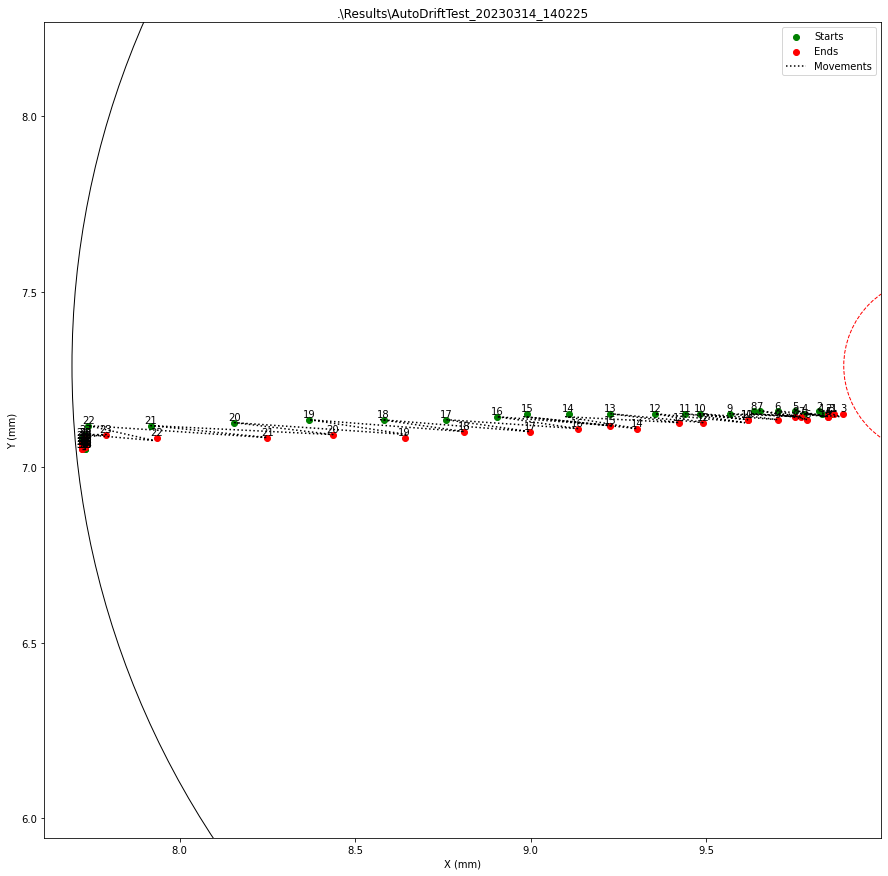

In [104]:
# Plot
figure = plt.figure(figsize=(15, 15))
ax = figure.add_subplot(111)
plt.scatter(starts['X (mm)'], starts['Y (mm)'],color='green',label="Starts")
plt.scatter(ends['X (mm)'], ends['Y (mm)'],c='red',label="Ends")
plt.plot(moves['X (mm)'],moves['Y (mm)'],color = 'black', linestyle = ':',label="Movements" )

circle_x = cc.circle['circle_x'] 
circle_y = cc.circle['circle_y']    
circle_r = cc.circle['circle_r']
circle1 = plt.Circle( (circle_x, circle_y ), circle_r , fill = False )
circle2 = plt.Circle( (circle_x, circle_y ), 0.25 , fill = False, color = 'r', linestyle = '--')
ax.add_artist( circle1 )
ax.add_artist( circle2 )

for (xi, yi, i) in zip(starts['X (mm)'], starts['Y (mm)'],list(range(1,len(starts['X (mm)']) +1))):
    plt.text(xi, yi, i, va='bottom', ha='center')
for (xi, yi, i) in zip(ends['X (mm)'], ends['Y (mm)'],list(range(1,len(ends['X (mm)']) +1))):
    plt.text(xi, yi, i, va='bottom', ha='center')

plt.title(folder)
plt.axis('equal')
plt.xlim()
plt.ylim()
plt.xlabel('X (mm)')
plt.ylabel('Y (mm)')
plt.legend(loc='best')
plt.savefig(folder + '\FullPlot')
plt.show()

[-0.0085  0.034  -0.0765 -0.0255 -0.051  -0.051  -0.017  -0.068  -0.085
 -0.0425 -0.085  -0.1275 -0.119  -0.119  -0.085  -0.1445 -0.1785 -0.2125
 -0.2125 -0.238  -0.1785 -0.0085 -0.0085  0.0085 -0.0085  0.0085  0.
  0.      0.      0.     -0.0085  0.      0.0085  0.      0.    ]
Total x drift: -2.0995


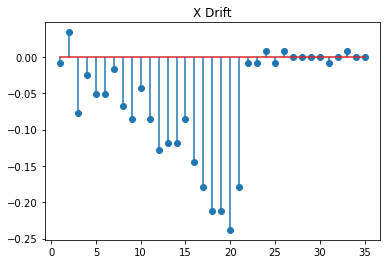

In [105]:
# Plot
#print(list(range(1,len(starts['X (mm)']) +1)))
xdrift = np.diff(starts['X (mm)'])
print(xdrift)
plt.stem(list(range(1,len(starts['X (mm)']))), xdrift)
#plt.stem(list(range(1,len(ends['X (mm)']) +1)), ends['Y (mm)'],c='red',label="Ends")

plt.title("X Drift")
print('Total x drift:',np.sum(xdrift))

[ 0.0085 -0.0085  0.      0.0085  0.      0.      0.     -0.0085  0.
  0.      0.      0.      0.      0.     -0.0085 -0.0085  0.      0.
 -0.0085 -0.0085  0.     -0.0255 -0.0085  0.     -0.0085 -0.0085  0.
 -0.0085  0.      0.      0.      0.     -0.0085  0.      0.    ]
Total y drift: -0.10199999999999942


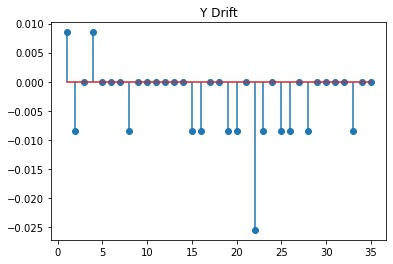

In [106]:
ydrift = np.diff(starts['Y (mm)'])
print(ydrift)
plt.stem(list(range(1,len(starts['Y (mm)']))), ydrift)

plt.title("Y Drift")
print('Total y drift:',np.sum(ydrift))